In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import ensemble
import xgboost as xgb
from numpy import loadtxt
from keras.utils.vis_utils import plot_model
import pydot

In [34]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [35]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [36]:
dfn = pd.read_csv('qsort_intel_xeon.csv')
df = pd.read_csv('qsort_intel.csv')

In [37]:
df.head()

,ps,num-cpus,runtime,power,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,...,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,num-cpu,bus_speed
0,10000,1,1417.9634,27.625819,InteCorei78700_DDR42666_16GB,3.168,X86_64,8,64,1,...,256,16,64,6,12288,16,DDR4,2666,6,4096
1,10000,10,3433.4365,75.175848,InteCorei78700_DDR42666_16GB,3.168,X86_64,8,64,1,...,256,16,64,6,12288,16,DDR4,2666,6,4096
2,10000,11,5709.7232,70.396933,InteCorei78700_DDR42666_16GB,3.168,X86_64,8,64,1,...,256,16,64,6,12288,16,DDR4,2666,6,4096
3,10000,12,13794.7644,66.084130,InteCorei78700_DDR42666_16GB,3.168,X86_64,8,64,1,...,256,16,64,6,12288,16,DDR4,2666,6,4096
4,10000,2,2017.1813,22.357435,InteCorei78700_DDR42666_16GB,3.168,X86_64,8,64,1,...,256,16,64,6,12288,16,DDR4,2666,6,4096


In [38]:
dfn.head()

,ps,num-cpus,runtime,power,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,...,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,num-cpu,bus_speed
0,10000,1,2913.9938,42.718416,IntelXeonE52620_DDR41866_16GB,2.4,X86_64,8,64,1,...,256,8,64,12,15360,16,DDR4,1866,12,32768
1,10000,10,4150.9162,75.426456,IntelXeonE52620_DDR41866_16GB,2.4,X86_64,8,64,1,...,256,8,64,12,15360,16,DDR4,1866,12,32768
2,10000,11,4796.9393,73.851278,IntelXeonE52620_DDR41866_16GB,2.4,X86_64,8,64,1,...,256,8,64,12,15360,16,DDR4,1866,12,32768
3,10000,12,3869.0799,95.208631,IntelXeonE52620_DDR41866_16GB,2.4,X86_64,8,64,1,...,256,8,64,12,15360,16,DDR4,1866,12,32768
4,10000,13,4409.5984,89.580765,IntelXeonE52620_DDR41866_16GB,2.4,X86_64,8,64,1,...,256,8,64,12,15360,16,DDR4,1866,12,32768


In [43]:
df.columns, len(df.columns), dfn.columns, len(dfn.columns) # bus-speed is extra in physical

(Index(['ps', 'num-cpus', 'runtime', 'power', 'arch', 'cpu-clock', 'isa',
        'l1d_assoc', 'l1d_cache_lines', 'l1d_shared_by_threads', 'l1d_size',
        'l2_assoc', 'l2_cache_lines', 'l2_shared_by_threads', 'l2_size',
        'l3_assoc', 'l3_cache_lines', 'l3_shared_by_threads', 'l3_size',
        'mem-size', 'mem-type', 'mem_clock', 'num-cpu', 'bus_speed'],
       dtype='object'),
 24,
 Index(['ps', 'num-cpus', 'runtime', 'power', 'arch', 'cpu-clock', 'isa',
        'l1d_assoc', 'l1d_cache_lines', 'l1d_shared_by_threads', 'l1d_size',
        'l2_assoc', 'l2_cache_lines', 'l2_shared_by_threads', 'l2_size',
        'l3_assoc', 'l3_cache_lines', 'l3_shared_by_threads', 'l3_size',
        'mem-size', 'mem-type', 'mem_clock', 'num-cpu', 'bus_speed'],
       dtype='object'),
 24)

In [44]:
len(df),len(dfn)

(360, 312)

In [45]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [46]:
encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

In [47]:
encoded_data_frame.head()

,ps,num-cpus,runtime,power,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,...,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type_1,mem-type_2,mem_clock,num-cpu,bus_speed
0,10000,1,1417.9634,27.625819,InteCorei78700_DDR42666_16GB,3.168,1,8,64,1,...,16,64,6,12288,16,1,0,2666,6,4096
1,10000,10,3433.4365,75.175848,InteCorei78700_DDR42666_16GB,3.168,1,8,64,1,...,16,64,6,12288,16,1,0,2666,6,4096
2,10000,11,5709.7232,70.396933,InteCorei78700_DDR42666_16GB,3.168,1,8,64,1,...,16,64,6,12288,16,1,0,2666,6,4096
3,10000,12,13794.7644,66.084130,InteCorei78700_DDR42666_16GB,3.168,1,8,64,1,...,16,64,6,12288,16,1,0,2666,6,4096
4,10000,2,2017.1813,22.357435,InteCorei78700_DDR42666_16GB,3.168,1,8,64,1,...,16,64,6,12288,16,1,0,2666,6,4096


In [48]:
encoded_data_frame_n.head()

,ps,num-cpus,runtime,power,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,...,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type_1,mem_clock,num-cpu,bus_speed
0,10000,1,2913.9938,42.718416,IntelXeonE52620_DDR41866_16GB,2.4,1,8,64,1,...,256,8,64,12,15360,16,1,1866,12,32768
1,10000,10,4150.9162,75.426456,IntelXeonE52620_DDR41866_16GB,2.4,1,8,64,1,...,256,8,64,12,15360,16,1,1866,12,32768
2,10000,11,4796.9393,73.851278,IntelXeonE52620_DDR41866_16GB,2.4,1,8,64,1,...,256,8,64,12,15360,16,1,1866,12,32768
3,10000,12,3869.0799,95.208631,IntelXeonE52620_DDR41866_16GB,2.4,1,8,64,1,...,256,8,64,12,15360,16,1,1866,12,32768
4,10000,13,4409.5984,89.580765,IntelXeonE52620_DDR41866_16GB,2.4,1,8,64,1,...,256,8,64,12,15360,16,1,1866,12,32768


In [49]:
encoded_data_frame.columns

Index(['ps', 'num-cpus', 'runtime', 'power', 'arch', 'cpu-clock', 'isa_1',
       'l1d_assoc', 'l1d_cache_lines', 'l1d_shared_by_threads', 'l1d_size',
       'l2_assoc', 'l2_cache_lines', 'l2_shared_by_threads', 'l2_size',
       'l3_assoc', 'l3_cache_lines', 'l3_shared_by_threads', 'l3_size',
       'mem-size', 'mem-type_1', 'mem-type_2', 'mem_clock', 'num-cpu',
       'bus_speed'],
      dtype='object')

In [50]:
encoded_data_frame_n.columns

Index(['ps', 'num-cpus', 'runtime', 'power', 'arch', 'cpu-clock', 'isa_1',
       'l1d_assoc', 'l1d_cache_lines', 'l1d_shared_by_threads', 'l1d_size',
       'l2_assoc', 'l2_cache_lines', 'l2_shared_by_threads', 'l2_size',
       'l3_assoc', 'l3_cache_lines', 'l3_shared_by_threads', 'l3_size',
       'mem-size', 'mem-type_1', 'mem_clock', 'num-cpu', 'bus_speed'],
      dtype='object')

In [51]:
total_data_n = encoded_data_frame_n.drop(columns = ['arch','mem-type_1' ])

In [52]:
total_data = encoded_data_frame.drop(columns = ['arch','mem-type_1' ,'mem-type_2' ])

In [53]:
total_data.columns, total_data_n.columns

(Index(['ps', 'num-cpus', 'runtime', 'power', 'cpu-clock', 'isa_1', 'l1d_assoc',
        'l1d_cache_lines', 'l1d_shared_by_threads', 'l1d_size', 'l2_assoc',
        'l2_cache_lines', 'l2_shared_by_threads', 'l2_size', 'l3_assoc',
        'l3_cache_lines', 'l3_shared_by_threads', 'l3_size', 'mem-size',
        'mem_clock', 'num-cpu', 'bus_speed'],
       dtype='object'),
 Index(['ps', 'num-cpus', 'runtime', 'power', 'cpu-clock', 'isa_1', 'l1d_assoc',
        'l1d_cache_lines', 'l1d_shared_by_threads', 'l1d_size', 'l2_assoc',
        'l2_cache_lines', 'l2_shared_by_threads', 'l2_size', 'l3_assoc',
        'l3_cache_lines', 'l3_shared_by_threads', 'l3_size', 'mem-size',
        'mem_clock', 'num-cpu', 'bus_speed'],
       dtype='object'))

In [54]:
total_data = total_data.fillna(0)
total_data_n = total_data_n.fillna(0)

In [55]:
X_Intel = total_data.drop(columns = ['runtime', 'power']).to_numpy()
Y_Intel = total_data[['runtime', 'power']].to_numpy()

In [56]:
X_ARM = total_data_n.drop(columns = ['runtime', 'power']).to_numpy()
Y_ARM = total_data_n[['runtime','power']].to_numpy()

In [57]:
X_Intel.shape, X_ARM.shape, Y_Intel.shape, Y_ARM.shape

((360, 20), (312, 20), (360, 2), (312, 2))

In [58]:
Y_Intel[:10], Y_ARM[:10] 

(array([[ 1417.9634    ,    27.62581883],
        [ 3433.4365    ,    75.17584787],
        [ 5709.7232    ,    70.39693273],
        [13794.7644    ,    66.08412972],
        [ 2017.1813    ,    22.3574351 ],
        [ 1896.5153    ,    25.77205678],
        [ 1931.29      ,    45.17695426],
        [ 2020.7552    ,    55.98035823],
        [ 2603.2647    ,    45.23815807],
        [ 2236.9698    ,    64.23113088]]),
 array([[2913.9938    ,   42.71841622],
        [4150.9162    ,   75.42645645],
        [4796.9393    ,   73.85127846],
        [3869.0799    ,   95.20863087],
        [4409.5984    ,   89.58076545],
        [6017.1787    ,   76.78794715],
        [6428.0685    ,   74.74070944],
        [5838.2504    ,   79.88776912],
        [5665.6326    ,   83.60695679],
        [6413.8787    ,   79.52066509]]))

In [59]:
# Separating ARM data to 10% and 99%
X_train_ARM, X_test_ARM, Y_train_ARM, Y_test_ARM = train_test_split(X_ARM, Y_ARM, test_size = 0.90, random_state=42)
print(X_train_ARM.shape, X_test_ARM.shape, Y_train_ARM.shape, Y_test_ARM.shape)
X_train_Intel = np.append(X_Intel, X_train_ARM,axis = 0)
Y_train_Intel = np.append(Y_Intel, Y_train_ARM,axis = 0)
print(X_train_Intel.shape, Y_train_Intel.shape, X_test_ARM.shape, Y_test_ARM.shape)

(31, 20) (281, 20) (31, 2) (281, 2)
(391, 20) (391, 2) (281, 20) (281, 2)


In [60]:
scaler_x = StandardScaler()
X_Intel = scaler_x.fit_transform(X_Intel)
X_train_ARM = scaler_x.fit_transform(X_train_ARM)
X_test_ARM = scaler_x.fit_transform(X_test_ARM)
scaler_y = StandardScaler()
# Y_Intel = np.reshape(Y_Intel, (len(Y_Intel),1))
# Y_test_ARM = np.reshape(Y_test_ARM, (len(Y_test_ARM),1))
# Y_train_ARM = np.reshape(Y_train_ARM, (len(Y_train_ARM),1))
Y_Intel = scaler_y.fit_transform(Y_Intel)
Y_test_ARM = scaler_y.fit_transform(Y_test_ARM)
Y_train_ARM = scaler_y.fit_transform(Y_train_ARM)
print(X_Intel.shape, Y_Intel.shape, X_train_ARM.shape, Y_train_ARM.shape, X_test_ARM.shape, Y_test_ARM.shape)

(360, 20) (360, 2) (31, 20) (31, 2) (281, 20) (281, 2)


In [61]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 9,794
Trainable params: 9,794
Non-trainable params: 0
_________________________________________________________________
Model : DNN 2 None


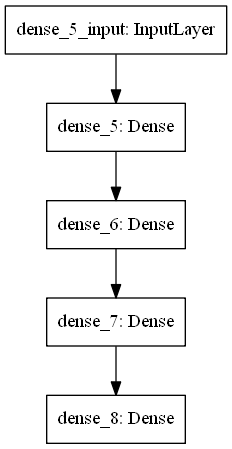

In [62]:
dnn_2 = Sequential()
dnn_2.add(Dense(64, input_dim = 20, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(64, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(64, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(2, activation='linear'))
print('Model : DNN 2', dnn_2.summary())
plot_model(dnn_2)

In [63]:
dnn_2.compile(loss='mae', optimizer='adam', metrics=['mae'])
dnn_2.fit(X_Intel, Y_Intel, epochs = 200, batch_size = 1, verbose = 2)

Epoch 1/200
 - 1s - loss: 0.3665 - mae: 0.3665
Epoch 2/200
 - 1s - loss: 0.2818 - mae: 0.2818
Epoch 3/200
 - 1s - loss: 0.2505 - mae: 0.2505
Epoch 4/200
 - 1s - loss: 0.2410 - mae: 0.2410
Epoch 5/200
 - 1s - loss: 0.2400 - mae: 0.2400
Epoch 6/200
 - 0s - loss: 0.2199 - mae: 0.2199
Epoch 7/200
 - 1s - loss: 0.2122 - mae: 0.2122
Epoch 8/200
 - 1s - loss: 0.2098 - mae: 0.2098
Epoch 9/200
 - 1s - loss: 0.2157 - mae: 0.2157
Epoch 10/200
 - 1s - loss: 0.2155 - mae: 0.2155
Epoch 11/200
 - 1s - loss: 0.2048 - mae: 0.2048
Epoch 12/200
 - 1s - loss: 0.1977 - mae: 0.1977
Epoch 13/200
 - 1s - loss: 0.2008 - mae: 0.2008
Epoch 14/200
 - 0s - loss: 0.1928 - mae: 0.1928
Epoch 15/200
 - 1s - loss: 0.1916 - mae: 0.1916
Epoch 16/200
 - 1s - loss: 0.1875 - mae: 0.1875
Epoch 17/200
 - 1s - loss: 0.1859 - mae: 0.1859
Epoch 18/200
 - 1s - loss: 0.1874 - mae: 0.1874
Epoch 19/200
 - 0s - loss: 0.1867 - mae: 0.1867
Epoch 20/200
 - 0s - loss: 0.1794 - mae: 0.1794
Epoch 21/200
 - 0s - loss: 0.1762 - mae: 0.1762
E

Epoch 171/200
 - 0s - loss: 0.1261 - mae: 0.1261
Epoch 172/200
 - 0s - loss: 0.1242 - mae: 0.1242
Epoch 173/200
 - 0s - loss: 0.1212 - mae: 0.1212
Epoch 174/200
 - 0s - loss: 0.1238 - mae: 0.1238
Epoch 175/200
 - 0s - loss: 0.1256 - mae: 0.1256
Epoch 176/200
 - 0s - loss: 0.1225 - mae: 0.1225
Epoch 177/200
 - 0s - loss: 0.1240 - mae: 0.1240
Epoch 178/200
 - 0s - loss: 0.1237 - mae: 0.1237
Epoch 179/200
 - 0s - loss: 0.1212 - mae: 0.1212
Epoch 180/200
 - 0s - loss: 0.1202 - mae: 0.1202
Epoch 181/200
 - 0s - loss: 0.1210 - mae: 0.1210
Epoch 182/200
 - 0s - loss: 0.1207 - mae: 0.1207
Epoch 183/200
 - 0s - loss: 0.1170 - mae: 0.1170
Epoch 184/200
 - 0s - loss: 0.1165 - mae: 0.1165
Epoch 185/200
 - 0s - loss: 0.1170 - mae: 0.1170
Epoch 186/200
 - 0s - loss: 0.1192 - mae: 0.1192
Epoch 187/200
 - 0s - loss: 0.1123 - mae: 0.1123
Epoch 188/200
 - 0s - loss: 0.1139 - mae: 0.1139
Epoch 189/200
 - 0s - loss: 0.1125 - mae: 0.1125
Epoch 190/200
 - 0s - loss: 0.1208 - mae: 0.1208
Epoch 191/200
 - 0s 

In [64]:
# Freeze the layers except the last 2 dense layers
for layer in dnn_2.layers[:-2]:
    layer.trainable = False
    print(layer)

# Check the trainable status of the individual layers
for layer in dnn_2.layers:
    print(layer, layer.trainable)

<keras.layers.core.Dense object at 0x000000FDC9285E10> False
<keras.layers.core.Dense object at 0x000000FDB9053C88> False
<keras.layers.core.Dense object at 0x000000FDCC82C080> True
<keras.layers.core.Dense object at 0x000000FDCD851DD8> True


In [65]:
dnn_2.fit(X_train_ARM, Y_train_ARM, epochs = 200, batch_size = 1, verbose = 2)

C:\Users\Rajat\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/200
 - 0s - loss: 0.5153 - mae: 0.5153
Epoch 2/200
 - 0s - loss: 0.3941 - mae: 0.3941
Epoch 3/200
 - 0s - loss: 0.3417 - mae: 0.3417
Epoch 4/200
 - 0s - loss: 0.3075 - mae: 0.3075
Epoch 5/200
 - 0s - loss: 0.2641 - mae: 0.2641
Epoch 6/200
 - 0s - loss: 0.2416 - mae: 0.2416
Epoch 7/200
 - 0s - loss: 0.2149 - mae: 0.2149
Epoch 8/200
 - 0s - loss: 0.2002 - mae: 0.2002
Epoch 9/200
 - 0s - loss: 0.1877 - mae: 0.1877
Epoch 10/200
 - 0s - loss: 0.1734 - mae: 0.1734
Epoch 11/200
 - 0s - loss: 0.1645 - mae: 0.1645
Epoch 12/200
 - 0s - loss: 0.1556 - mae: 0.1556
Epoch 13/200
 - 0s - loss: 0.1560 - mae: 0.1560
Epoch 14/200
 - 0s - loss: 0.1456 - mae: 0.1456
Epoch 15/200
 - 0s - loss: 0.1428 - mae: 0.1428
Epoch 16/200
 - 0s - loss: 0.1379 - mae: 0.1379
Epoch 17/200
 - 0s - loss: 0.1403 - mae: 0.1403
Epoch 18/200
 - 0s - loss: 0.1289 - mae: 0.1289
Epoch 19/200
 - 0s - loss: 0.1359 - mae: 0.1359
Epoch 20/200
 - 0s - loss: 0.1124 - mae: 0.1124
Epoch 21/200
 - 0s - loss: 0.1284 - mae: 0.1284
E

Epoch 171/200
 - 0s - loss: 0.0651 - mae: 0.0651
Epoch 172/200
 - 0s - loss: 0.0561 - mae: 0.0561
Epoch 173/200
 - 0s - loss: 0.0540 - mae: 0.0540
Epoch 174/200
 - 0s - loss: 0.0493 - mae: 0.0493
Epoch 175/200
 - 0s - loss: 0.0601 - mae: 0.0601
Epoch 176/200
 - 0s - loss: 0.0457 - mae: 0.0457
Epoch 177/200
 - 0s - loss: 0.0569 - mae: 0.0569
Epoch 178/200
 - 0s - loss: 0.0553 - mae: 0.0553
Epoch 179/200
 - 0s - loss: 0.0452 - mae: 0.0452
Epoch 180/200
 - 0s - loss: 0.0465 - mae: 0.0465
Epoch 181/200
 - 0s - loss: 0.0502 - mae: 0.0502
Epoch 182/200
 - 0s - loss: 0.0524 - mae: 0.0524
Epoch 183/200
 - 0s - loss: 0.0713 - mae: 0.0713
Epoch 184/200
 - 0s - loss: 0.0483 - mae: 0.0483
Epoch 185/200
 - 0s - loss: 0.0623 - mae: 0.0623
Epoch 186/200
 - 0s - loss: 0.0603 - mae: 0.0603
Epoch 187/200
 - 0s - loss: 0.0571 - mae: 0.0571
Epoch 188/200
 - 0s - loss: 0.0437 - mae: 0.0437
Epoch 189/200
 - 0s - loss: 0.0546 - mae: 0.0546
Epoch 190/200
 - 0s - loss: 0.0547 - mae: 0.0547
Epoch 191/200
 - 0s 

In [66]:
pickle.dump(dnn_2, open('dnn_model_qsort_Intel_to_Xeon', 'wb'))

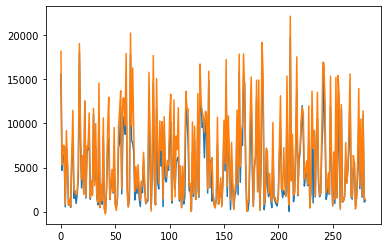

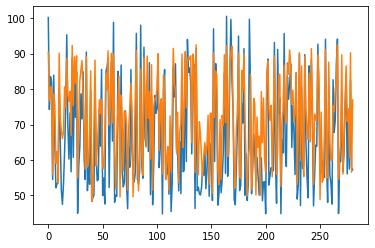

In [67]:
Y_pred = dnn_2.predict(X_test_ARM)
Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test_ARM)
plt.plot(Y_pred[:,0])
plt.plot(Y_fold[:,0])
plt.figure()
plt.plot(Y_pred[:,1])
plt.plot(Y_fold[:,1])

MSE: 
 1905735.2337490513

R2: 
 0.6201191791577698

MAPE Runtime: 
 0.18043304299753168

MAPE Power: 
 0.11080411232362825


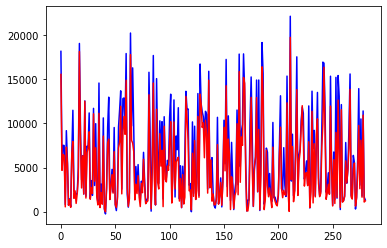

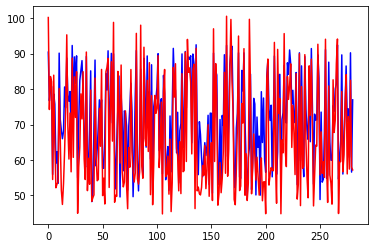

In [68]:
# Y_fold = scaler_y.inverse_transform(Y_test_ARM)
# Y_pred = scaler_y.inverse_transform(Y_pred)
plt.figure()
plt.plot(Y_fold[:,0], 'b')
plt.plot(Y_pred[:,0], 'r')
plt.figure()
plt.plot(Y_fold[:,1], 'b')
plt.plot(Y_pred[:,1], 'r')
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores_runtime = (absolute_percentage_error(Y_fold[:,0], Y_pred[:,0]))
mape_scores_power = (absolute_percentage_error(Y_fold[:,1], Y_pred[:,1]))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE Runtime: \n', mape_scores_runtime)
print('\nMAPE Power: \n', mape_scores_power)